In [3]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.transforms import Bbox


In [19]:
df = pd.read_csv("combined_results.csv")

metric = "LogLoss"
df = df[df["metric"] == metric]
#df = df[df['suite_id'] == 336]

splits = [s for s in df["split_method"].unique() if s.lower() != "random_split"]
 
method_order = [
    'ConstantPredictor', 'LogisticRegressor' , 'RandomForestClassifier', 'RandomForestRegressor', 'LGBMClassifier', 'LGBMRegressor',
    'Engression', 'MLP', 'ResNet', 'FTTransformer', 'DGBT', 'DRF'
]
rename_map = {
    'RandomForestClassifier': 'Random Forest',
    'RandomForestRegressor': 'Random Forest',
    'LGBMClassifier': 'Boosted Trees',
    'LGBMRegressor': 'Boosted Trees',
    'FTTransformer': 'FT-Transformer',
    'LogisticRegressor': 'Logistic Regression',
}

# 3) Extract unique suites, metrics, and extrapolation methods
suites  = df['suite_id'].unique()
metrics = df['metric'].unique()
methods = df['split_method'].unique()

Split 'umap_split': baseline LogLoss per task:
 task_id
361055    0.516482
361060    0.434706
361061    0.439924
361062    0.014759
361063    0.287054
361065    0.210547
361066    0.477767
361068    0.192935
361069    0.559179
361070    0.693147
361110    0.543525
361111    0.679124
361113    0.645586
361273    0.668977
361274    0.478436
361275    0.540888
361276    0.618132
361277    0.352256
361278    0.648099
361282    0.643274
361283    0.564775
361285    0.427274
361286    0.603608
dtype: float64
Split 'umap_split': overall lowest LogLoss = 0.014759013



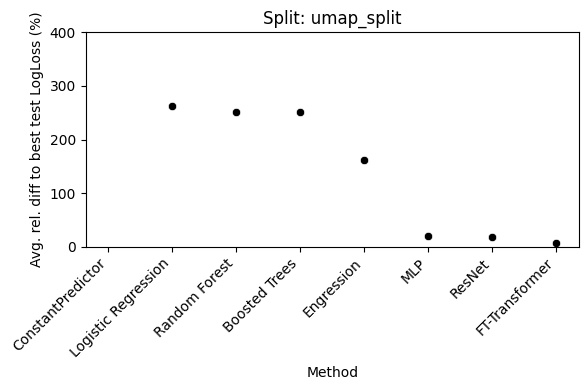

Split 'kmedoids_split': baseline LogLoss per task:
 task_id
361110    0.507872
361111    0.658086
361113    0.526221
361282    0.622923
361283    0.460022
361285    0.454733
361286    0.604441
dtype: float64
Split 'kmedoids_split': overall lowest LogLoss = 0.454733485



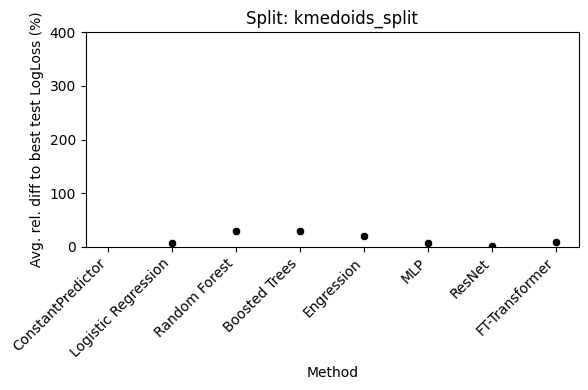

Split 'gower_split': baseline LogLoss per task:
 task_id
361110    0.427206
361111    0.677898
361113    0.498078
361282    0.613067
361283    0.488261
361285    0.444867
361286    0.586617
dtype: float64
Split 'gower_split': overall lowest LogLoss = 0.427206074



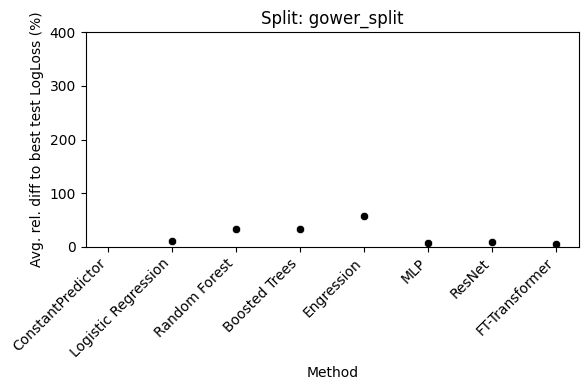

Split 'mahalanobis_split': baseline LogLoss per task:
 task_id
361055    0.530355
361060    0.437099
361061    0.408561
361062    0.014027
361063    0.444028
361065    0.168174
361066    0.358817
361068    0.275626
361069    0.553676
361070    0.693147
361273    0.636186
361274    0.509555
361275    0.559545
361276    0.686696
361277    0.316023
361278    0.543509
dtype: float64
Split 'mahalanobis_split': overall lowest LogLoss = 0.014027327



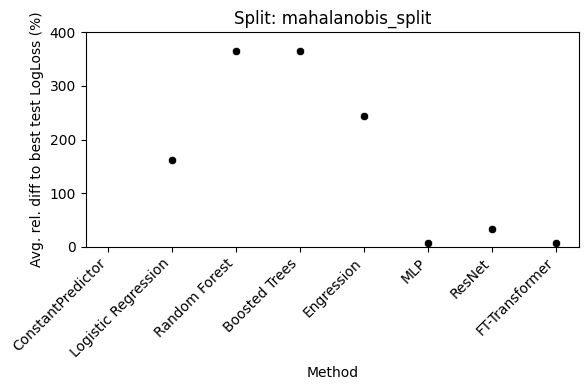

Split 'kmeans_split': baseline LogLoss per task:
 task_id
361055    0.496865
361060    0.341989
361061    0.413642
361062    0.016683
361063    0.365540
361065    0.204121
361066    0.415663
361068    0.241887
361069    0.549884
361070    0.693147
361273    0.642692
361274    0.568295
361275    0.444180
361276    0.624566
361277    0.287109
361278    0.645289
dtype: float64
Split 'kmeans_split': overall lowest LogLoss = 0.016682651



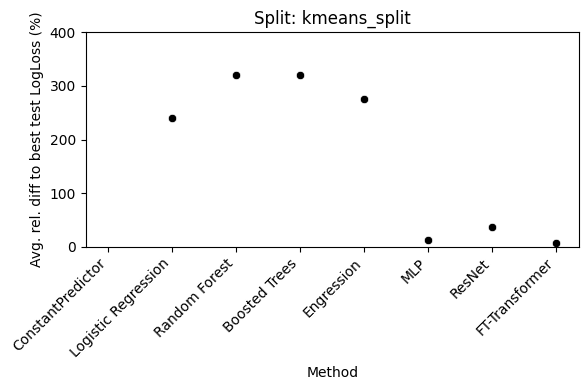

Split 'spatial_depth_split': baseline LogLoss per task:
 task_id
361055    0.522322
361060    0.433320
361061    0.427636
361062    0.013702
361063    0.436679
361065    0.170664
361066    0.374116
361068    0.317505
361069    0.552344
361070    0.685693
361273    0.638846
361274    0.511542
361275    0.567089
361276    0.651434
361277    0.315939
361278    0.542708
dtype: float64
Split 'spatial_depth_split': overall lowest LogLoss = 0.013701651



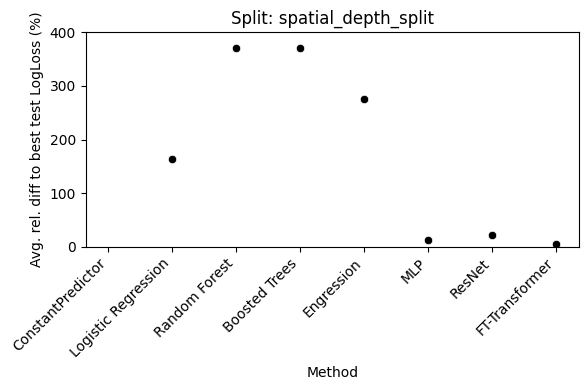

In [20]:
outdir = os.path.join('PICTURES', metric.lower())
os.makedirs(outdir, exist_ok=True)

for split in splits:
    sub = df[df["split_method"] == split]
    if sub.empty:
        continue

    table = sub.pivot(
        index="model",
        columns="task_id",
        values="value"
    )

    baseline = table.min(axis=0)
    print(f"Split '{split}': baseline LogLoss per task:\n", baseline)
    print(f"Split '{split}': overall lowest LogLoss = {baseline.min()}\n")

    rel = (table -baseline) / baseline

    summary = pd.DataFrame({
        "Mean": rel.mean(axis=1),
        "Median": rel.median(axis=1),
        "Std": rel.std(axis=1)
    }).reset_index().rename(columns={"model": "Method"})

    summary["Method"] = pd.Categorical(
        summary["Method"],
        categories=method_order,
        ordered=True
    )
    summary = summary.sort_values("Method")
    summary["Method"] = summary["Method"].astype(str).map(rename_map).fillna(summary["Method"].astype(str))

    summary["Mean"] = 100 * summary["Mean"]

    plt.figure(figsize=(6, 4))
    sns.scatterplot(data=summary, x="Method", y="Mean", color='black')
    plt.xlabel("Method")
    plt.ylabel("Avg. rel. diff to best test LogLoss (%)")
    plt.title(f"Split: {split}")
    plt.ylim(0, 400)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()

    fname = f"{split}_relative_diff_{metric}.png"
    plt.savefig(os.path.join(outdir, fname), bbox_inches='tight')
    plt.show()




In [14]:
df = df[df["metric"] == "LogLoss"]

df = df[df["split_method"] != "random_split"]


=== RAW relative_difference sample ===
      split_method  task_id              model      value  baseline  \
1     random_split   361110  LogisticRegressor   0.511903  0.401918   
3     random_split   361110  ConstantPredictor  18.238089  0.401918   
5       umap_split   361110  LogisticRegressor   0.597111  0.543525   
7       umap_split   361110  ConstantPredictor  18.958962  0.543525   
9   kmedoids_split   361110  LogisticRegressor   0.512814  0.507872   
11  kmedoids_split   361110  ConstantPredictor  20.997524  0.507872   
13     gower_split   361110  LogisticRegressor   0.452231  0.427206   
15     gower_split   361110  ConstantPredictor  20.941363  0.427206   
17    random_split   361110         Engression   0.617910  0.401918   
18    random_split   361110                MLP   0.420350  0.401918   
20    random_split   361110             ResNet   0.427179  0.401918   
22    random_split   361110      FTTransformer   0.401918  0.401918   
25     gower_split   361110         E

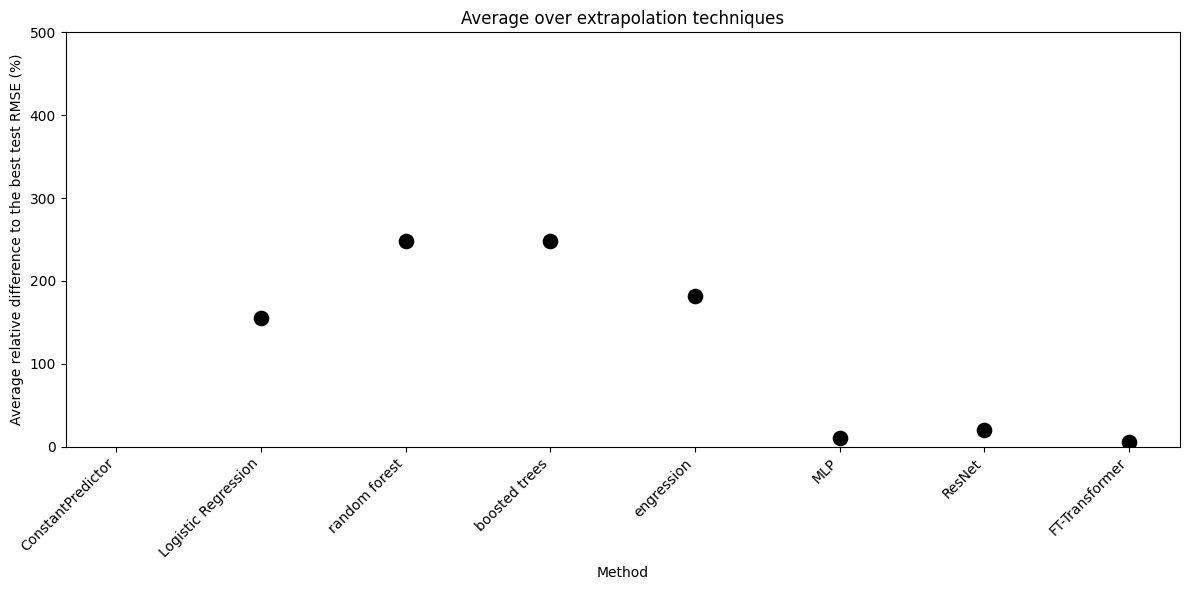

In [21]:
df["baseline"] = (
    df
    .groupby(["split_method", "task_id"])["value"]
    .transform("min")
)

df["relative_difference"] = (df["value"] - df["baseline"]) / df["baseline"]

print("\n=== RAW relative_difference sample ===")
print(df[['split_method','task_id','model','value','baseline','relative_difference']].head(20))

print("\n=== per-model relative_difference summary ===")
print(df.groupby('model')['relative_difference']
        .agg(count='count', mean='mean', min='min', max='max')
        .sort_values('mean', ascending=False)
     )

print("\n=== model appearance counts ===")
print(df.groupby('model')['relative_difference']
        .count()
        .sort_values(ascending=False)
     )

# 3) Compute overall mean per model
# --- assume df already has 'relative_difference' computed and filtered ---

# 1) Compute overall average per raw model name
overall = (
    df
    .groupby('model')['relative_difference']
    .mean()
    .reset_index(name='Mean')
)
overall['Mean'] *= 100  # to percent

# 2) Enforce complete ordering on the raw model keys
method_order = [
    'ConstantPredictor', 'LogisticRegressor',
    'RandomForestClassifier', 'RandomForestRegressor',
    'LGBMClassifier', 'LGBMRegressor', 'Engression',
    'MLP', 'ResNet', 'FTTransformer', 'DGBT', 'DRF'
]
overall = overall.set_index('model').reindex(method_order).reset_index()

# 3) Map to display names
rename_map = {
    'RandomForestClassifier':'random forest',
    'RandomForestRegressor':'random forest',
    'LGBMClassifier':       'boosted trees',
    'LGBMRegressor':        'boosted trees',
    'Engression':           'engression',
    'MLP':                  'MLP',
    'ResNet':               'ResNet',
    'FTTransformer':        'FT-Transformer',
    'LogisticRegressor':    'Logistic Regression',
}
overall['Method'] = overall['model'].map(rename_map).fillna(overall['model'])


plt.figure(figsize=(12,6))
sns.scatterplot(data=overall, x='Method', y='Mean', color='black', s=150)
plt.xticks(rotation=45, ha='right')
plt.ylabel('Average relative difference to the best test RMSE (%)')
plt.xlabel('Method')
plt.title('Average over extrapolation techniques')
plt.ylim(0, 500)
plt.tight_layout()

os.makedirs('PICTURES', exist_ok=True)
plt.savefig('PICTURES/average_over_extrapolation_techniques_LogLoss.png', bbox_inches='tight')
plt.show()
